In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')

# *Exploring dataset

In [2]:
data = pd.read_csv('pulsar_stars.csv')

print('Number of Features:%s' %data.shape[1])
print('Number of Examples:%s' %data.shape[0])
data.head()

Number of Features:9
Number of Examples:17898


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [4]:
data.columns = ['mean_profile','std_profile','kurtosis_profile','skewness_profile','mean_dmsnr','std_dmsnr','kurtosis_dmsnr','skewness_dmsnr','target']

In [5]:
data.head()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
data.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [7]:
data.isnull().sum()

mean_profile        0
std_profile         0
kurtosis_profile    0
skewness_profile    0
mean_dmsnr          0
std_dmsnr           0
kurtosis_dmsnr      0
skewness_dmsnr      0
target              0
dtype: int64

# *Visualisations of dataset

Text(0.5, 1.0, 'Correlations between features')

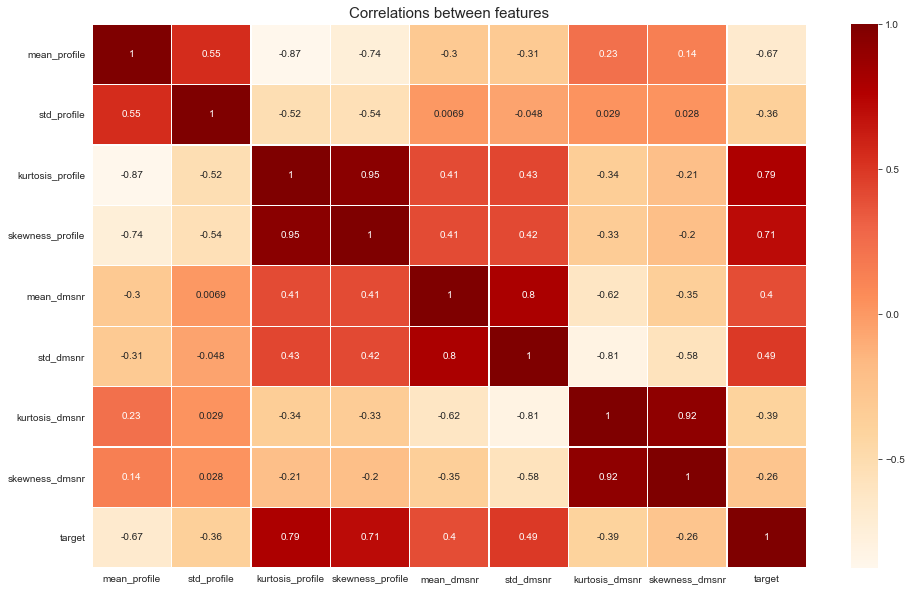

In [8]:
plt.figure(figsize=(16,10))
cbar_kws={'ticks' :[-1,-0.5,0,0.5,1],'orientation':'vertical'}
sns.heatmap(data.corr(),cmap='OrRd',annot=True,linewidths=0.4,cbar_kws=cbar_kws)
plt.title("Correlations between features",  fontsize=15)

# Not Pulsar star/plusar star

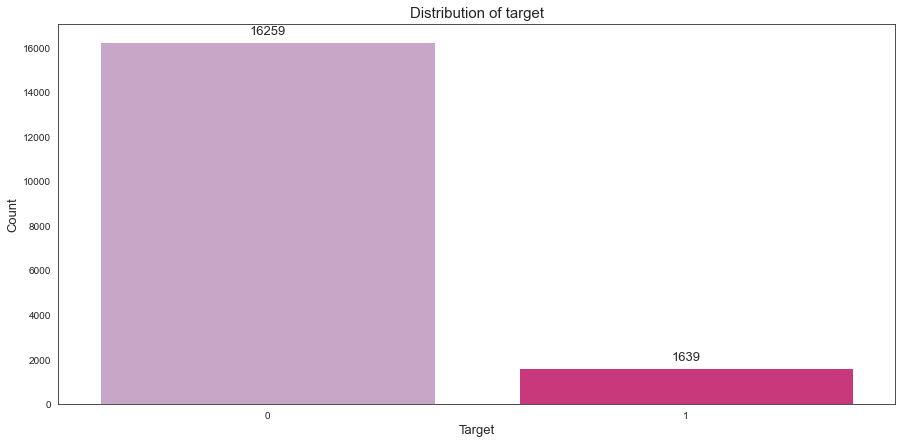

In [9]:
plt.figure(figsize=(15,7))
vis1 = sns.countplot(data['target'],palette='PuRd')
plt.title('Distribution of target',fontsize=15)
plt.xlabel('Target',fontsize=13)
plt.ylabel('Count', fontsize=13)

for i in vis1.patches:
    vis1.annotate(format(i.get_height(),'.0f'),(i.get_x() + i.get_width()/2., i.get_height()),
                 ha='center' , va='center',xytext = (0,10),textcoords='offset points', fontsize=13)

In [10]:
data1 = data.groupby('target')[['mean_profile','std_profile','kurtosis_profile','skewness_profile','mean_dmsnr','std_dmsnr','kurtosis_dmsnr','skewness_dmsnr']].mean().reset_index()
data1

,target,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr
0,0,116.562726,47.339741,0.210440,0.380844,8.863258,23.287984,8.862674,113.620344
1,1,56.690608,38.710598,3.130655,15.553576,49.825995,56.468963,2.757069,17.931728


In [11]:
data1=data1.transpose().reset_index()
data1.columns = ['features','Not Pulsar Star','Pulsar Star']

In [12]:
data1

,features,Not Pulsar Star,Pulsar Star
0,target,0.000000,1.000000
1,mean_profile,116.562726,56.690608
2,std_profile,47.339741,38.710598
3,kurtosis_profile,0.210440,3.130655
4,skewness_profile,0.380844,15.553576
5,mean_dmsnr,8.863258,49.825995
6,std_dmsnr,23.287984,56.468963
7,kurtosis_dmsnr,8.862674,2.757069
8,skewness_dmsnr,113.620344,17.931728


# *Mean Values of every column for pulser star and not pulser star

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'mean_profile'),
  Text(1, 0, 'std_profile'),
  Text(2, 0, 'kurtosis_profile'),
  Text(3, 0, 'skewness_profile'),
  Text(4, 0, 'mean_dmsnr'),
  Text(5, 0, 'std_dmsnr'),
  Text(6, 0, 'kurtosis_dmsnr'),
  Text(7, 0, 'skewness_dmsnr')])

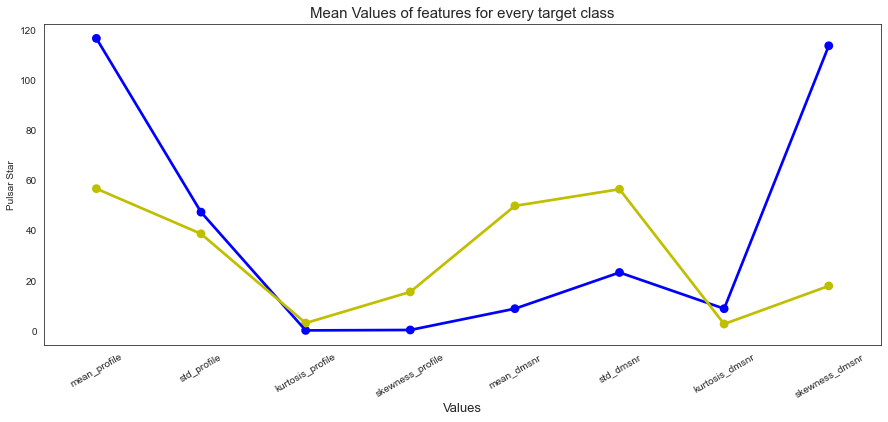

In [13]:
plt.figure(figsize=(15,13))
plt.subplot(211)
vis2=sns.pointplot(data=data1.iloc[1:], x='features',y='Not Pulsar Star',color='b',label='Not Pulsar Star')
vis3=sns.pointplot(data=data1.iloc[1:], x='features',y='Pulsar Star',color='y',label='Pulsar Star')

plt.title('Mean Values of features for every target class',fontsize=15)
plt.xlabel('Feature',fontsize=13)
plt.xlabel('Values',fontsize=13)
plt.xticks(rotation=30)



# *Scatter plots for kurtosis and skweness for targets and for dmsnr and profile.

Text(0, 0.5, 'Skweness DMSNR')

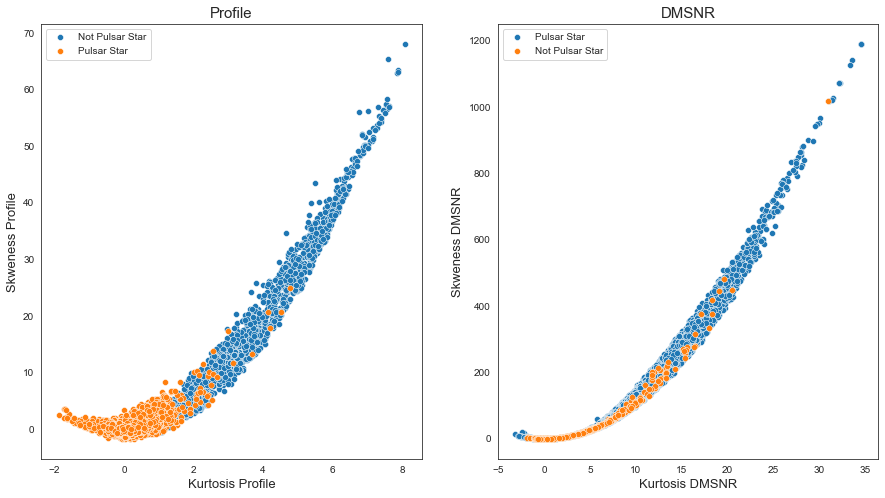

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.scatterplot(data=data[data['target']==1], x='kurtosis_profile',y='skewness_profile',label='Not Pulsar Star')
sns.scatterplot(data=data[data['target']==0], x='kurtosis_profile',y='skewness_profile',label='Pulsar Star')
plt.title('Profile', fontsize=15)
plt.xlabel('Kurtosis Profile', fontsize=13)
plt.ylabel('Skweness Profile', fontsize=13)


plt.subplot(122)
sns.scatterplot(data=data[data['target']==0], x='kurtosis_dmsnr',y='skewness_dmsnr',label='Pulsar Star')
sns.scatterplot(data=data[data['target']==1], x='kurtosis_dmsnr',y='skewness_dmsnr',label='Not Pulsar Star')
plt.title('DMSNR', fontsize=15)
plt.xlabel('Kurtosis DMSNR', fontsize=13)
plt.ylabel('Skweness DMSNR', fontsize=13)

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,auc,mean_absolute_error,mean_squared_error
import sklearn.linear_model as lm

# *Train/Test

In [16]:
X = data.drop('target',axis = 1)
y = data['target']

scaler = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=100)

# *Model

In [17]:
svm=SVC(random_state=4,probability=True)
linear=SVC(C=100,gamma=0.1,kernel="linear")
poly=SVC(C=100,gamma='auto',kernel='poly',degree=3)
sigmoid=SVC(C=100,gamma=0.3,kernel="sigmoid")

# *Function

In [18]:
def model_algorithm(algorithm,AX_train,AY_train,AX_test,AY_test,name):
    print("Model: %s" %name), '\n'
    algorithm.fit(AX_train, AY_train)
    prediction = algorithm.predict(AX_test)
    score_train = round(algorithm.score(AX_train,AY_train)*100)
    score_test = round(algorithm.score(AX_test,AY_test)*100)
    class_report=classification_report(AY_test,prediction)
    print('Train Accuracy:%s' %score_train), '%'
    print('Test Accuracy:%s' %score_test), '%','\n'
    print('Classification Report: '), '\n'
    print(class_report)
    
    
    plt.figure(figsize=(18,13))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(AY_test, prediction), annot=True,cmap='OrRd',fmt='d',annot_kws={'size':15})
    plt.title('Confusion Matrix of'  +name,fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.subplot(222)
    fpr,tpr,thresholds = roc_curve(AY_test,prediction)
    plt.plot([0,1],[0,1], linestyle = "dashed",color = "b")
    plt.plot(fpr,tpr,color="red",label=('Area under the curve: ',round(auc(fpr,tpr),4)))
    plt.title('Roc Curve of'  +name,fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate',fontsize=14)
    plt.legend(loc='best',fontsize=15)
    
    #metrics
    mae = round(mean_absolute_error(AY_test,prediction),4)
    mse = round(mean_squared_error(AY_test,prediction),4)
    rmse = round(np.sqrt(mse),4)
    
    print('Metrics of: %s'  %name), '\n'
    print('Mean Absolute Error : %s' %mae)
    print('Mean Absolute Error : %s' %mae)
    print('Root Mean Squared Error: %s' %rmse)
    
    

Model:  Support Vector Machine
Train Accuracy:97
Test Accuracy:97
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4874
           1       0.94      0.77      0.85       496

    accuracy                           0.97      5370
   macro avg       0.96      0.88      0.92      5370
weighted avg       0.97      0.97      0.97      5370

Metrics of:  Support Vector Machine
Mean Absolute Error : 0.0255
Mean Absolute Error : 0.0255
Root Mean Squared Error: 0.1597


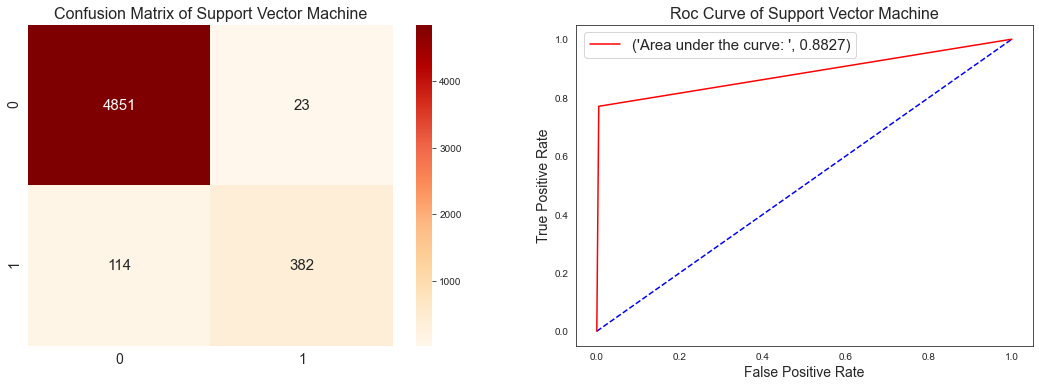

In [19]:
model_algorithm(svm, X_train, y_train, X_test, y_test, ' Support Vector Machine')

Model: Support Vector Machine Kernel:Linear
Train Accuracy:98
Test Accuracy:98
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4874
           1       0.94      0.85      0.89       496

    accuracy                           0.98      5370
   macro avg       0.96      0.92      0.94      5370
weighted avg       0.98      0.98      0.98      5370

Metrics of: Support Vector Machine Kernel:Linear
Mean Absolute Error : 0.0192
Mean Absolute Error : 0.0192
Root Mean Squared Error: 0.1386


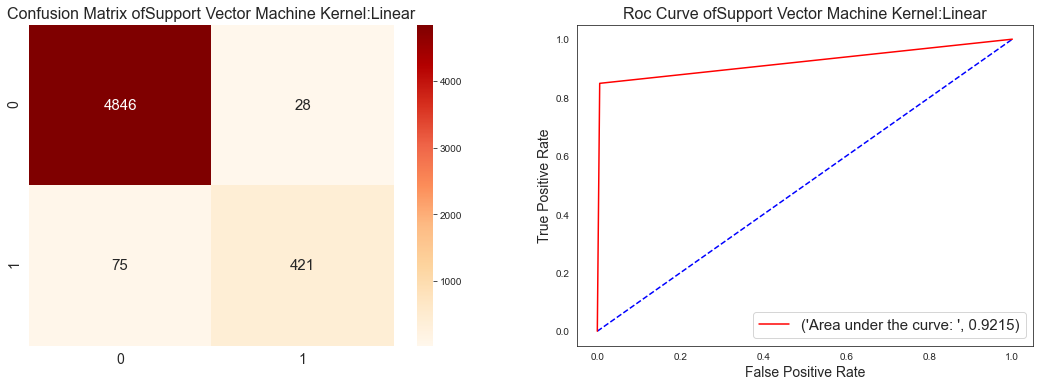

In [20]:
model_algorithm(linear, X_train, y_train, X_test, y_test, 'Support Vector Machine Kernel:Linear')

Model:  Support Vector Machine Kernel:Sigmoid
Train Accuracy:91
Test Accuracy:91
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4874
           1       0.00      0.00      0.00       496

    accuracy                           0.91      5370
   macro avg       0.45      0.50      0.48      5370
weighted avg       0.82      0.91      0.86      5370

Metrics of:  Support Vector Machine Kernel:Sigmoid
Mean Absolute Error : 0.0924
Mean Absolute Error : 0.0924
Root Mean Squared Error: 0.304


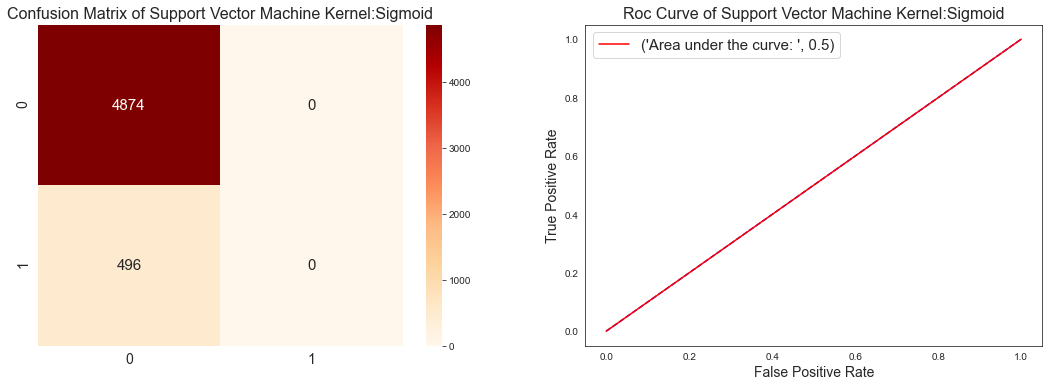

In [21]:
model_algorithm(sigmoid, X_train, y_train, X_test, y_test, ' Support Vector Machine Kernel:Sigmoid')

In [ ]:
model_algorithm(poly, X_train, y_train, X_test, y_test, ' Support Vector Machine Kernel:poly')

Model:  Support Vector Machine Kernel:poly
